In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

In [47]:
data = pd.read_csv("heart_d.csv")

In [48]:
df = pd.DataFrame(data)

In [49]:
df = pd.read_csv("heart_d.csv")
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [51]:
df.shape

(1025, 14)

In [52]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

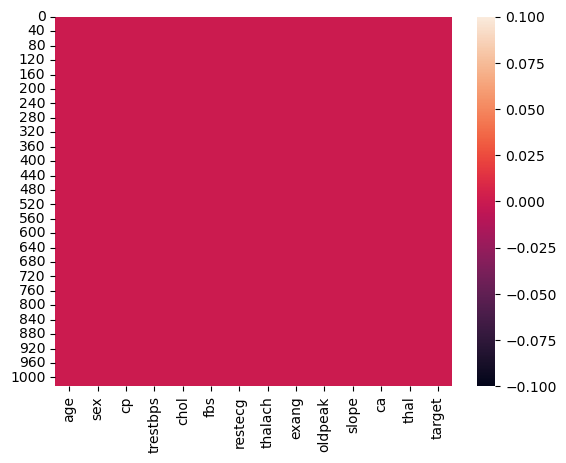

In [53]:
sns.heatmap(df.isnull())

In [54]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


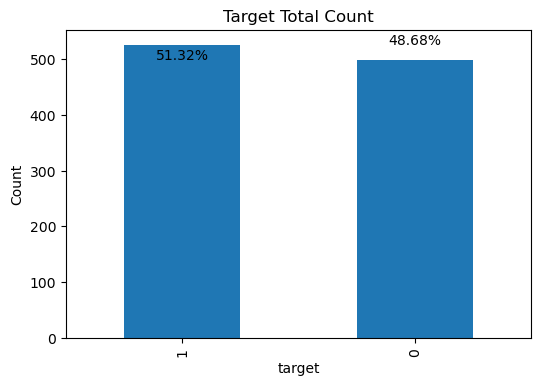

In [55]:
# Plot the bar chart
plt.figure(figsize=(6,4))
plt.title("Target Total Count")
plt.xlabel("Target")
plt.ylabel("Count")
df["target"].value_counts().plot(kind='bar')

# Calculate percentages
value_counts = df["target"].value_counts()
total_count = value_counts.sum()
percentages = value_counts / total_count * 100

# Add count percentages on top of bars
for i, percentage in enumerate(percentages):
    plt.text(i, value_counts[i] + 0.5, f"{percentage:.2f}%", ha='center')

# Show the plot
plt.show()


In [56]:
def plotting(col, df=df):
    return df.groupby(col)['target'].value_counts().unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='age'>

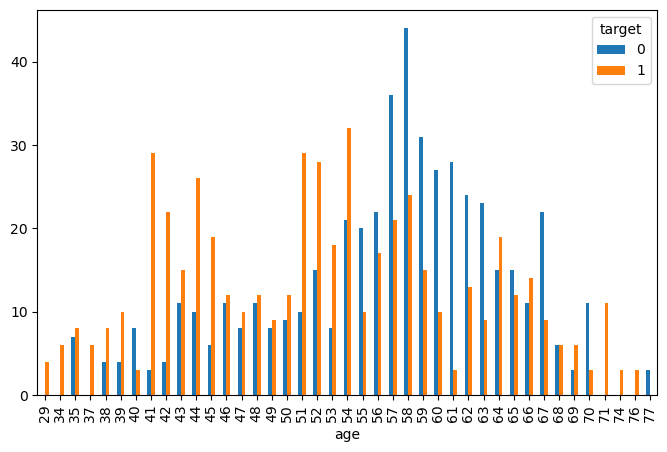

In [57]:
plotting("age")

<Axes: xlabel='sex'>

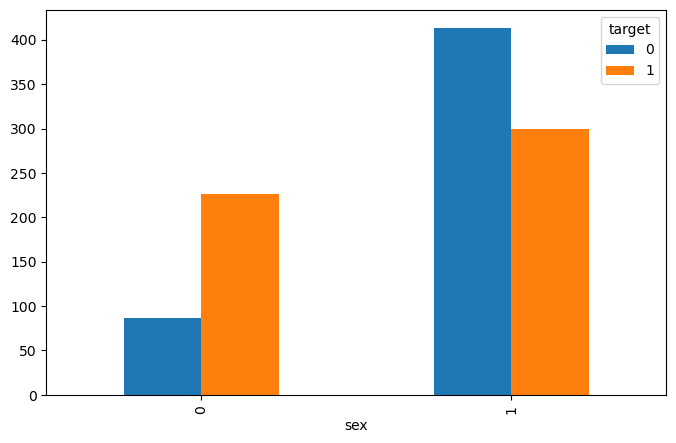

In [58]:
plotting("sex")

<Axes: xlabel='cp'>

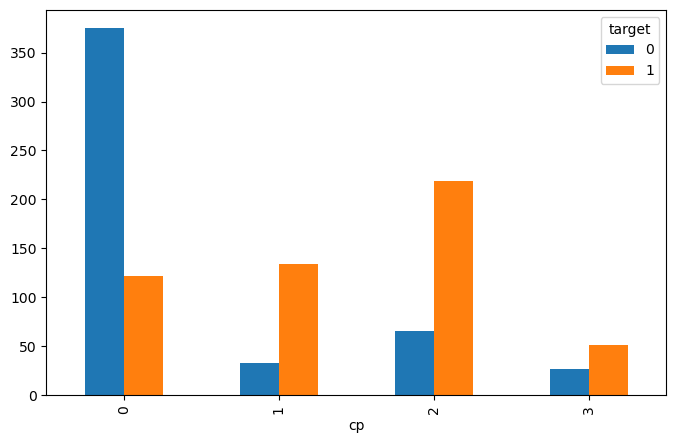

In [59]:
plotting("cp")

<Axes: xlabel='trestbps'>

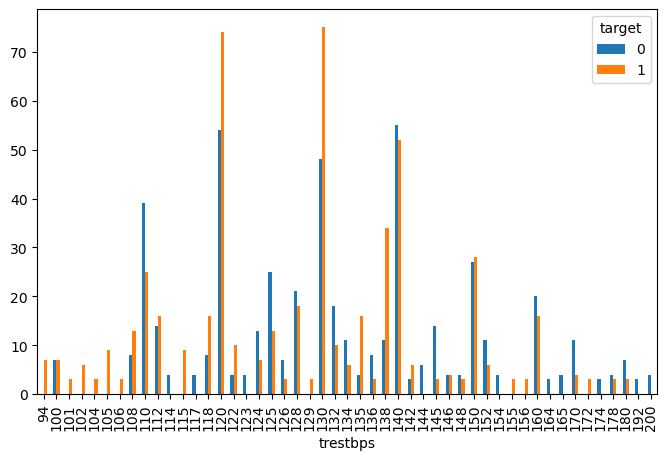

In [60]:
plotting("trestbps")

<Axes: xlabel='chol'>

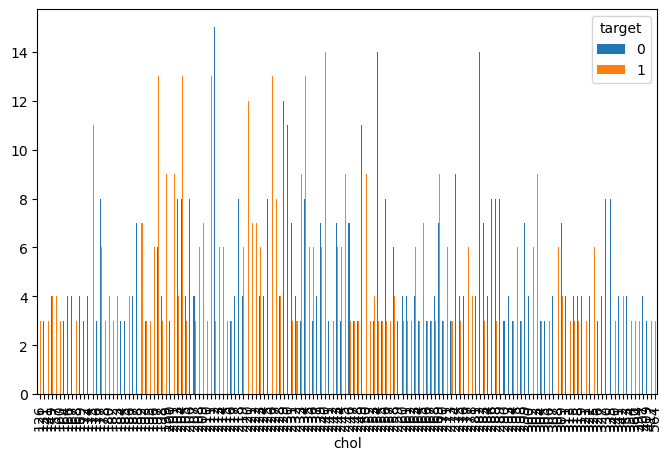

In [61]:
plotting("chol")

<Axes: xlabel='fbs'>

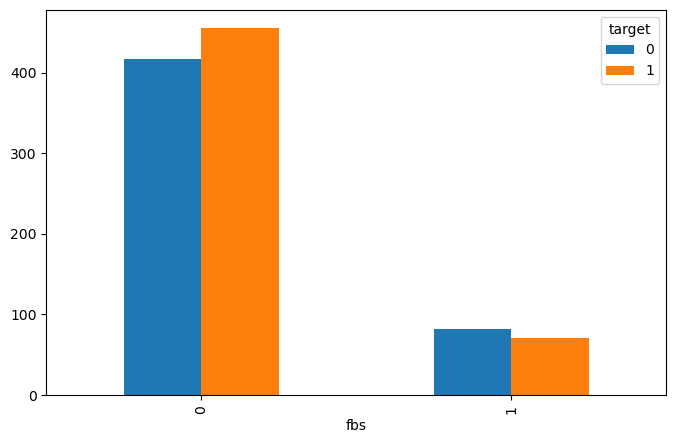

In [62]:
plotting("fbs")

<Axes: xlabel='restecg'>

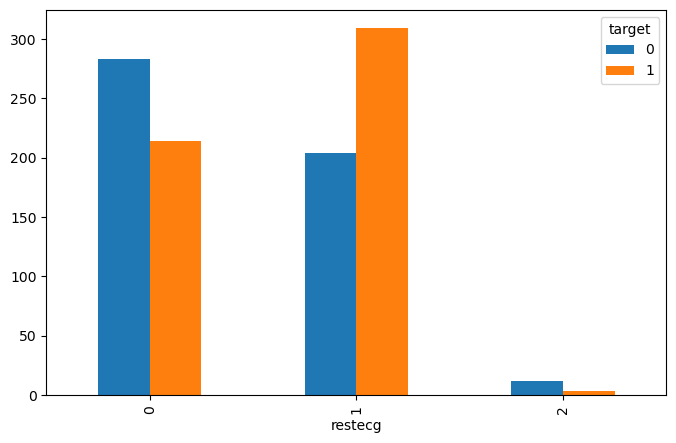

In [63]:
plotting("restecg")

<Axes: xlabel='thalach'>

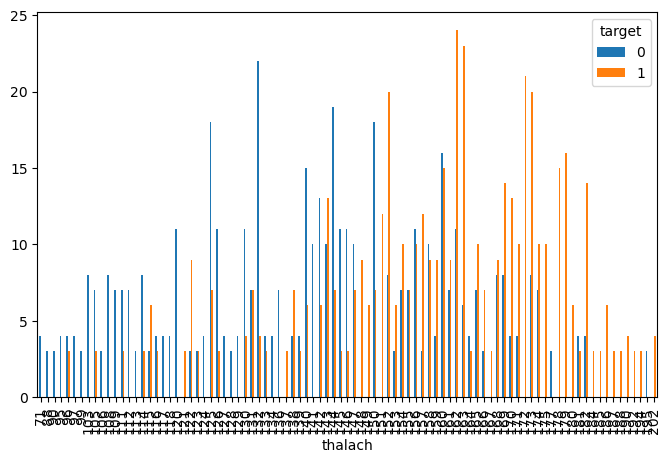

In [64]:
plotting("thalach")

<Axes: xlabel='exang'>

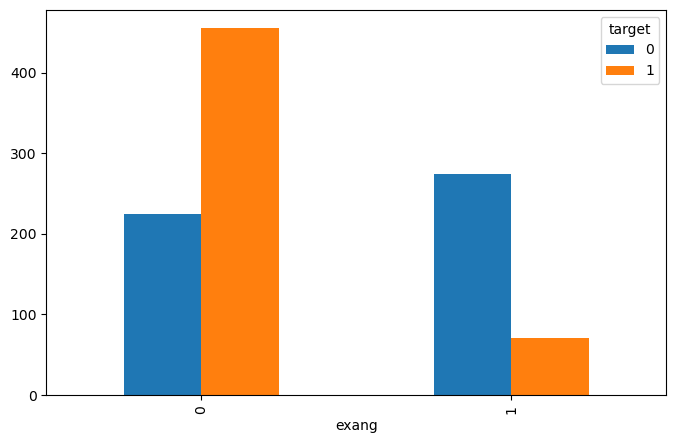

In [65]:
plotting("exang")

<Axes: xlabel='oldpeak'>

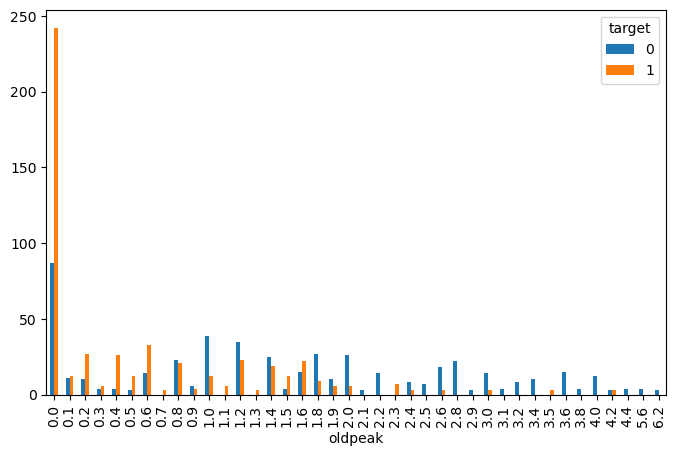

In [66]:
plotting("oldpeak")

<Axes: xlabel='slope'>

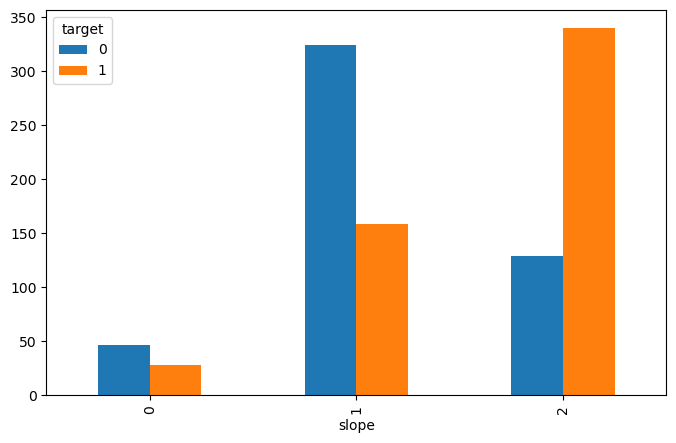

In [67]:
plotting("slope")

<Axes: xlabel='ca'>

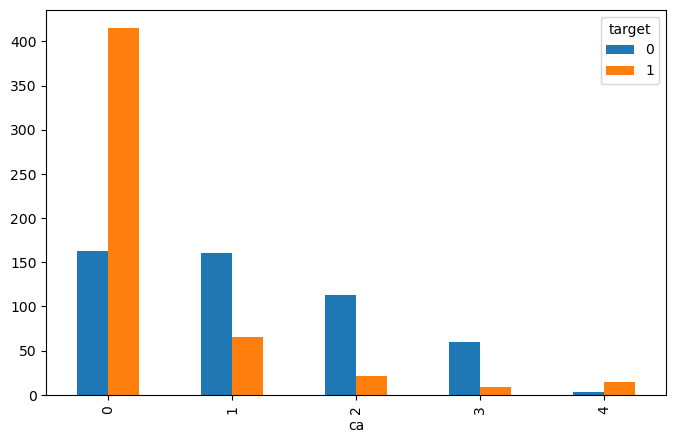

In [68]:
plotting("ca")

<Axes: xlabel='thal'>

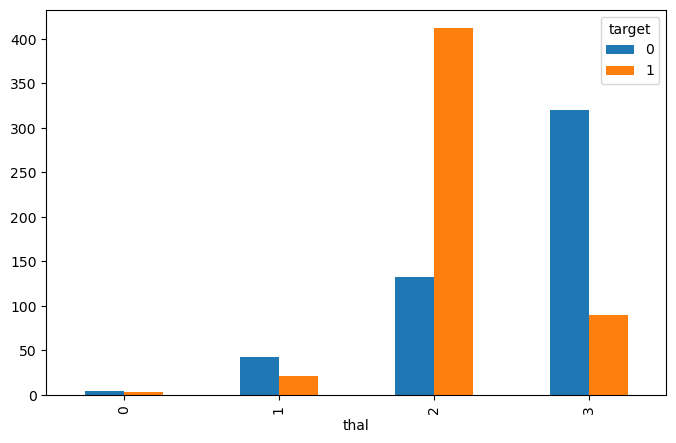

In [69]:
plotting("thal")

<Axes: >

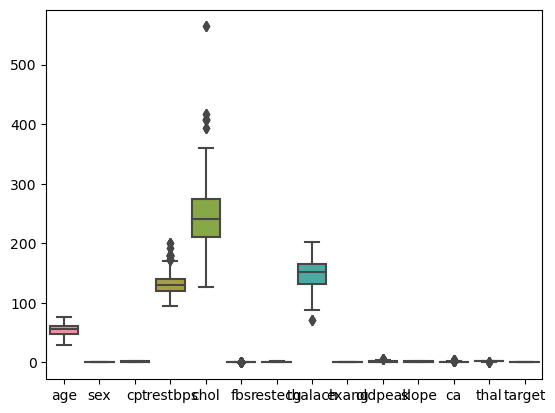

In [70]:
sns.boxplot(df)

In [71]:
Q1 = df.quantile(0.25)

Q1

In [72]:
Q1

age          48.0
sex           0.0
cp            0.0
trestbps    120.0
chol        211.0
fbs           0.0
restecg       0.0
thalach     132.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        0.0
Name: 0.25, dtype: float64

In [73]:
Q3 = df.quantile(0.75)

In [74]:
Q3

age          61.0
sex           1.0
cp            2.0
trestbps    140.0
chol        275.0
fbs           0.0
restecg       1.0
thalach     166.0
exang         1.0
oldpeak       1.8
slope         2.0
ca            1.0
thal          3.0
target        1.0
Name: 0.75, dtype: float64

In [75]:
IQR = Q3 - Q1
IQR

age         13.0
sex          1.0
cp           2.0
trestbps    20.0
chol        64.0
fbs          0.0
restecg      1.0
thalach     34.0
exang        1.0
oldpeak      1.8
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64

In [76]:
df=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [77]:
df.shape

(769, 14)

<Axes: >

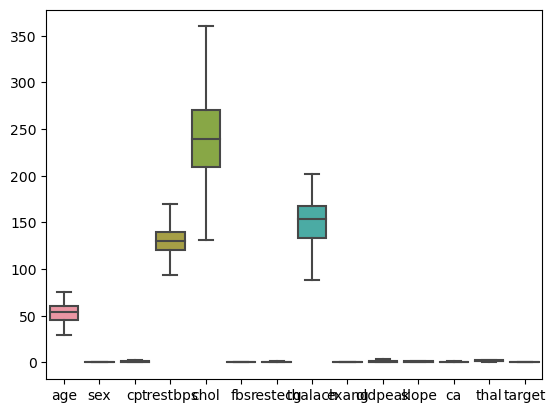

In [78]:
sns.boxplot(df)

In [79]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


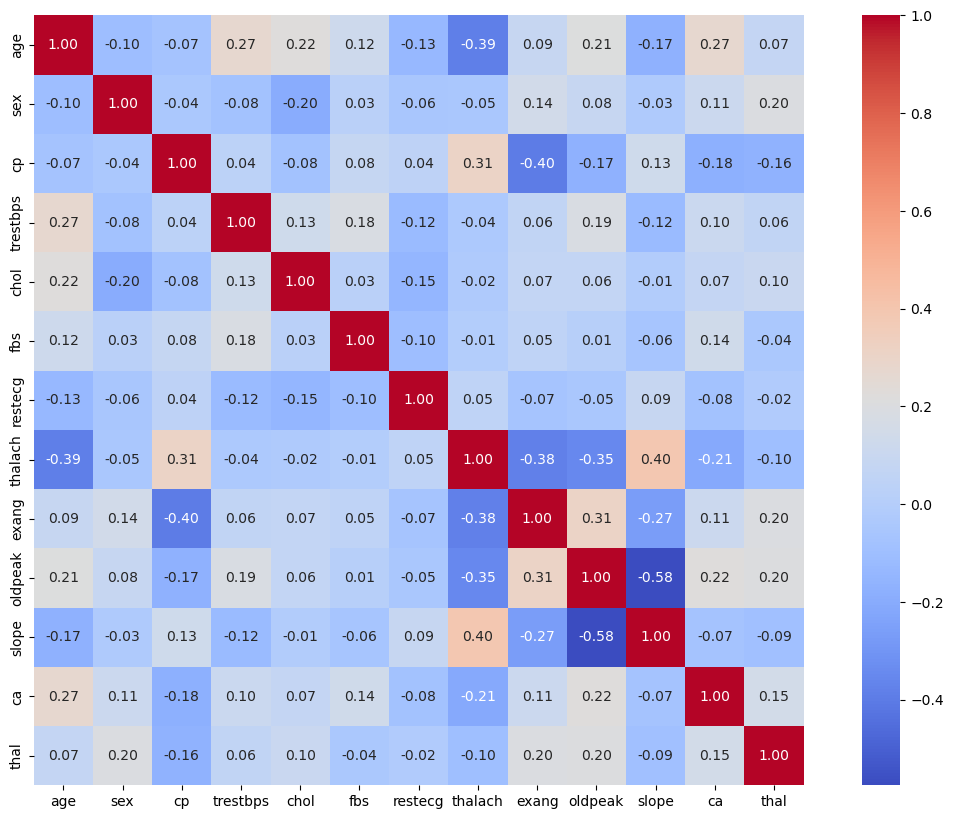

In [80]:
# Load the data
data = pd.read_csv('heart_d.csv')

# Drop non-numeric columns and the target column 'diagnosis' for correlation analysis
numeric_columns = data.drop(columns=['target']).select_dtypes(include=[np.number])

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)

# Show plot
plt.show()


In [81]:
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

In [82]:
df.shape

(769, 14)

In [83]:
x=df.drop(columns=['target'])
y=df['target']

In [84]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [85]:
y

0       0
2       0
3       0
5       1
7       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 769, dtype: int64

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=0)

In [87]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
44,55,0,1,132,342,0,1,166,0,1.2,2,0,2
757,66,1,0,160,228,0,0,138,0,2.3,2,0,1
567,41,1,2,130,214,0,0,168,0,2.0,1,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
506,61,1,0,120,260,0,1,140,1,3.6,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2
263,55,0,1,132,342,0,1,166,0,1.2,2,0,2
851,37,1,2,130,250,0,1,187,0,3.5,0,0,2
760,57,1,0,150,276,0,0,112,1,0.6,1,1,1


In [88]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
887,57,1,0,110,201,0,1,126,1,1.5,1,0,1
167,57,0,0,120,354,0,1,163,1,0.6,2,0,2
153,54,1,2,120,258,0,0,147,0,0.4,1,0,3
21,67,0,0,106,223,0,1,142,0,0.3,2,2,2
858,68,0,2,120,211,0,0,115,0,1.5,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,61,0,0,130,330,0,0,169,0,0.0,2,0,2
224,51,1,0,140,261,0,0,186,1,0.0,2,0,2
259,66,1,0,120,302,0,0,151,0,0.4,1,0,2
558,39,0,2,94,199,0,1,179,0,0.0,2,0,2


In [89]:
y_train

44      1
757     1
567     1
1021    0
506     0
       ..
1019    1
263     1
851     1
760     0
915     0
Name: target, Length: 538, dtype: int64

In [90]:
y_test

887    1
167    1
153    1
21     1
858    1
      ..
670    0
224    1
259    1
558    1
381    0
Name: target, Length: 231, dtype: int64

In [91]:
sm = SMOTE(random_state=42, k_neighbors=5)
x, y = sm.fit_resample(x, y)
a=y.value_counts()
a

target
0    422
1    422
Name: count, dtype: int64

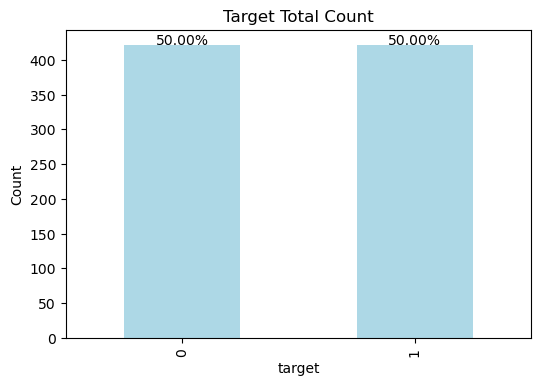

In [92]:
# Plot the bar chart
plt.figure(figsize=(6,4))
plt.title("Target Total Count")
plt.xlabel("Target")
plt.ylabel("Count")
y_value_counts = y.value_counts()
y_value_counts.plot(kind='bar', color='lightblue')

# Calculate percentages
total_count = y_value_counts.sum()
percentages = y_value_counts / total_count * 100

# Add count percentages on top of bars
for i, percentage in enumerate(percentages):
    plt.text(i, y_value_counts[i] + 0.5, f"{percentage:.2f}%", ha='center')

# Show the plot
plt.show()


In [93]:
# Replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)


In [94]:
# Create the imputer with strategy='mean' or 'median'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)

# Transform the test data using the imputer fitted on the training data
x_test_imputed = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)


In [95]:
Training_Accuracy_L=[]
Test_Accuracy_L=[]
Sensitivity_L=[]
Specificity_L=[]
F1Score_L=[]
Precision_L=[]
Negative_Predictive_Value_L=[]
False_Negative_Rate_L=[]
False_Positive_Rate_L=[]
False_Discovery_Rate_L=[]
False_Omission_Rate_L=[]
average_cv_accuracy_L=[]

In [96]:
import math


def rounder(n):
  try:
    return math.ceil(n * 1000) / 1000
  except:
    return n

def fun(model,name):
  test_pred = model.predict(x_test)
  train_pred = model.predict(x_train)

  train_acc=rounder(accuracy_score(y_train,train_pred)*100)
  test_acc=rounder(accuracy_score(y_test,test_pred)*100)

  Training_Accuracy_L.append(train_acc)
  Test_Accuracy_L.append(test_acc)

  print("\nTraining Accuracy:", train_acc)
  print("\nTesting Accuracy:",test_acc)

  print(classification_report(y_test,test_pred))
  test_conf_matrix = confusion_matrix(y_test,test_pred)
  plt.figure(figsize=(4, 4))
  sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Greens', cbar=False)
  t=name+' Confusion Matrix - Test Set'
  plt.title(t)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  tn, fp,fn,tp = test_conf_matrix.ravel()

  Sensitivity=rounder((tp) / (tp + fn))
  Sensitivity_L.append(Sensitivity)

  Specificity=rounder((tn) / (tn + fp))
  Specificity_L.append(Specificity)

  F1Score=rounder( (2 * tp) / (2 * tp+ fp + fn))
  F1Score_L.append(F1Score)

  Precision=rounder((tp) / (tp +fp))
  Precision_L.append(Precision)

  Negative_Predictive_Value= rounder((tn) / (tn + fn))
  Negative_Predictive_Value_L.append(Negative_Predictive_Value)

  False_Negative_Rate=rounder((fn) / (fn + tp))
  False_Negative_Rate_L.append(False_Negative_Rate)

  False_Positive_Rate=rounder((fp) / (fp + tn))
  False_Positive_Rate_L.append(False_Positive_Rate)

  False_Discovery_Rate=rounder((fp) / (fp + tp))
  False_Discovery_Rate_L.append(False_Discovery_Rate)

  False_Omission_Rate=rounder((fn) / (fn+ tn))
  False_Omission_Rate_L.append(False_Omission_Rate)


  print('Sensitivity:', Sensitivity)
  print('Specificity:', Specificity)
  print('F1 Score:', F1Score)
  print('Precision:',Precision)
  print('Negative Predictive Value:', Negative_Predictive_Value)
  print('False Negative Rate:',False_Negative_Rate)
  print('False Positive Rate:',False_Positive_Rate)
  print('False Discovery Rate:',False_Discovery_Rate)
  print('False Omission Rate:', False_Omission_Rate)

  num_folds = 5
  kf = KFold(n_splits=num_folds, shuffle=True,random_state=42)
  cv_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='accuracy')
  print(f"\n{num_folds}-Fold Cross-Validation Scores:")
  print(cv_scores)
  average_cv_accuracy = rounder(np.mean(cv_scores))
  print(f"\nAverage Cross-Validation Accuracy: {average_cv_accuracy * 100:.2f}%")
  average_cv_accuracy_L.append(average_cv_accuracy)



Accuracy: 0.8874458874458875
Cross-validated Support Vector Machine Accuracy: 84.39252336448598


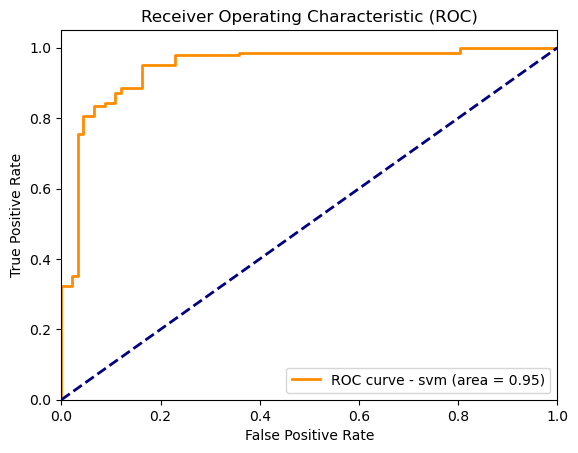

In [97]:
# Create an SVM model
sv = svm.SVC(kernel='linear', probability=True)

# Use SimpleImputer to fill in missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Fit the model
sv.fit(x_train_imputed, y_train)

# Predict on the test set
y_pred_svm = sv.predict(x_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

cv_linear_reg = cross_val_score(sv, x_train_imputed, y_train, cv=5)
print(f"Cross-validated Support Vector Machine Accuracy: {cv_linear_reg.mean()*100}")

try:
    y_prob = sv.predict_proba(x_test_imputed)[:, 1]

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - svm (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

except AttributeError as e:
    print("AttributeError:", e)



Training Accuracy: 87.547

Testing Accuracy: 88.745
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        92
           1       0.90      0.92      0.91       139

    accuracy                           0.89       231
   macro avg       0.89      0.88      0.88       231
weighted avg       0.89      0.89      0.89       231



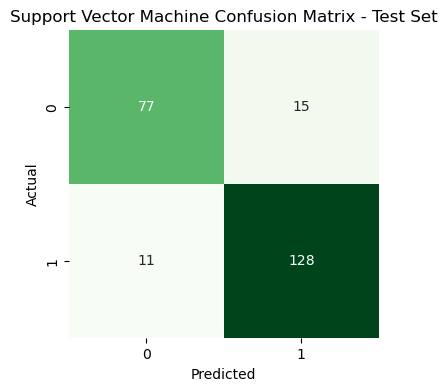

Sensitivity: 0.921
Specificity: 0.837
F1 Score: 0.908
Precision: 0.896
Negative Predictive Value: 0.875
False Negative Rate: 0.08
False Positive Rate: 0.164
False Discovery Rate: 0.105
False Omission Rate: 0.125

5-Fold Cross-Validation Scores:
[0.80555556 0.85185185 0.90740741 0.81308411 0.8411215 ]

Average Cross-Validation Accuracy: 84.40%


In [98]:
fun(sv,'Support Vector Machine')

Accuracy: 0.8614718614718615
Cross-validated Logistic Regression Accuracy: 87.17203184492904


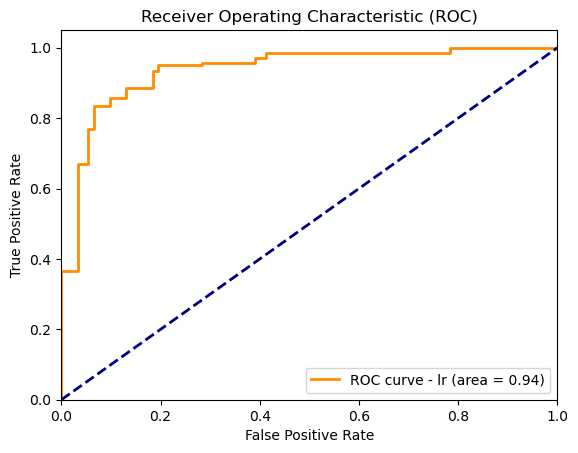

In [99]:
log_reg = LogisticRegression()

# Use SimpleImputer to fill in missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Fit the model
log_reg.fit(x_train_imputed, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(x_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy:", accuracy)

cv_log_reg = cross_val_score(log_reg, x_train_imputed, y_train, cv=5)
print(f"Cross-validated Logistic Regression Accuracy: {cv_log_reg.mean()*100}")
try:
    y_prob_log_reg = log_reg.predict_proba(x_test_imputed)[:, 1]

# Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_prob_log_reg)
    roc_auc = auc(fpr, tpr)

# Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - lr (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
except AttributeError as e:
    print("AttributeError:", e)



Training Accuracy: 87.547

Testing Accuracy: 86.148
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        92
           1       0.88      0.88      0.88       139

    accuracy                           0.86       231
   macro avg       0.86      0.86      0.86       231
weighted avg       0.86      0.86      0.86       231



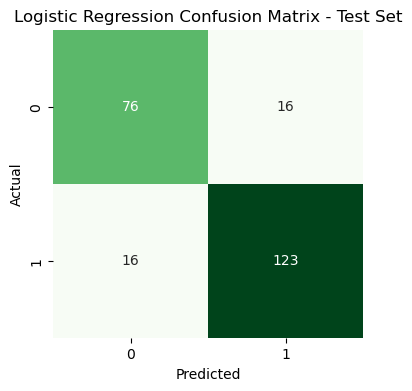

Sensitivity: 0.885
Specificity: 0.827
F1 Score: 0.885
Precision: 0.885
Negative Predictive Value: 0.827
False Negative Rate: 0.116
False Positive Rate: 0.174
False Discovery Rate: 0.116
False Omission Rate: 0.174

5-Fold Cross-Validation Scores:
[0.76851852 0.88888889 0.89814815 0.8411215  0.85046729]

Average Cross-Validation Accuracy: 85.00%


In [100]:
fun(log_reg,'Logistic Regression')

The accuracy score achieved using Decision Tree is: 100.0 %
Cross-validated Decision Tree Accuracy: 96.83627552786432


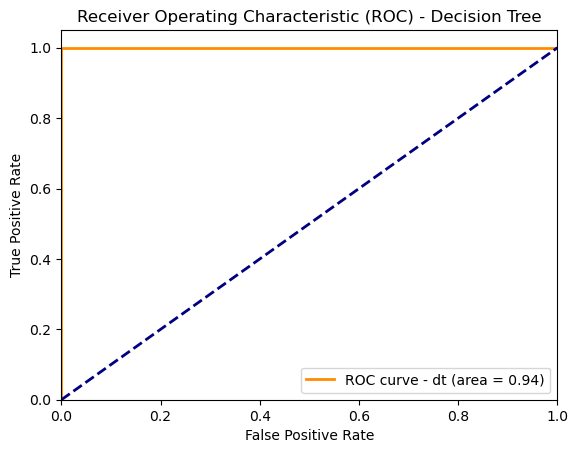

In [101]:
max_accuracy = 0
best_x = None
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    y_pred_dt = dt.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test_imputed)

score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

cv_dt = cross_val_score(dt, x_train_imputed, y_train, cv=5)
print(f"Cross-validated Decision Tree Accuracy: {cv_dt.mean()*100}")
try:
    y_prob_dt = dt.predict_proba(x_test_imputed)[:, 1]


# Compute ROC curve and ROC area for each class
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve
    plt.figure()
    plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve - dt (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Decision Tree')
    plt.legend(loc="lower right")
    plt.show()
except AttributeError as e:
         print("AttributeError:", e)




Training Accuracy: 100.0

Testing Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       139

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



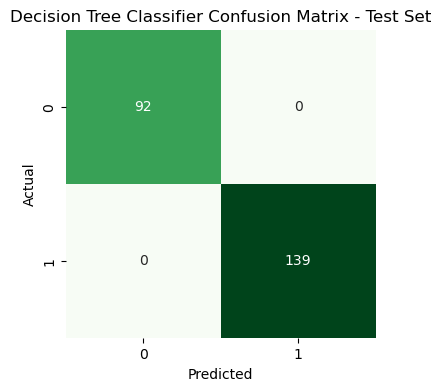

Sensitivity: 1.0
Specificity: 1.0
F1 Score: 1.0
Precision: 1.0
Negative Predictive Value: 1.0
False Negative Rate: 0.0
False Positive Rate: 0.0
False Discovery Rate: 0.0
False Omission Rate: 0.0

5-Fold Cross-Validation Scores:
[0.99074074 0.97222222 0.96296296 0.95327103 0.92523364]

Average Cross-Validation Accuracy: 96.10%


In [102]:
fun(dt,'Decision Tree Classifier')

Accuracy:

 0.8441558441558441
Cross-validated naive bayes Accuracy: 84.01523018345449


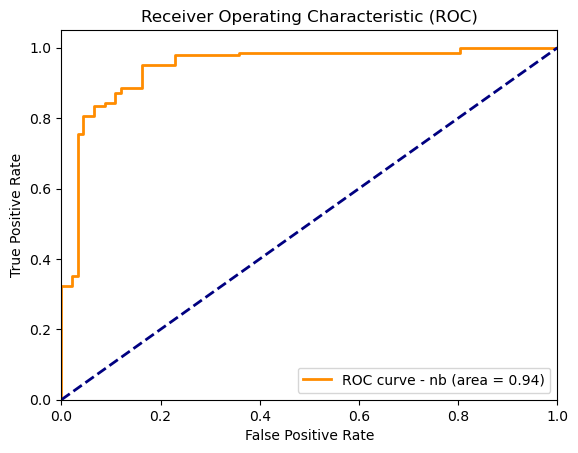

In [103]:
nb = GaussianNB()

# Use SimpleImputer to fill in missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Fit the model
nb.fit(x_train_imputed, y_train)

# Predict on the test set
y_pred_nb = nb.predict(x_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

cv_accuracy = cross_val_score(nb, x_train_imputed, y_train, cv=5)
print(f"Cross-validated naive bayes Accuracy: {cv_accuracy.mean()*100}")
try:
    y_prob_nb = nb.predict_proba(x_test_imputed)[:, 1]

# Compute ROC curve and ROC area for each class
    fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob)
    roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
    plt.figure()
    plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve - nb (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
except AttributeError as e:
    print("AttributeError:", e)



Training Accuracy: 83.458

Testing Accuracy: 84.416
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        92
           1       0.89      0.85      0.87       139

    accuracy                           0.84       231
   macro avg       0.84      0.84      0.84       231
weighted avg       0.85      0.84      0.84       231



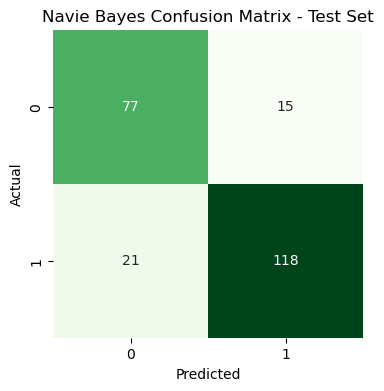

Sensitivity: 0.849
Specificity: 0.837
F1 Score: 0.868
Precision: 0.888
Negative Predictive Value: 0.786
False Negative Rate: 0.152
False Positive Rate: 0.164
False Discovery Rate: 0.113
False Omission Rate: 0.215

5-Fold Cross-Validation Scores:
[0.81481481 0.85185185 0.87962963 0.82242991 0.79439252]

Average Cross-Validation Accuracy: 83.30%


In [104]:
fun(nb,'Navie Bayes')

 Random Forest Accuracy: 1.0
Cross-validated Random Forest Accuracy: 84.01523018345449


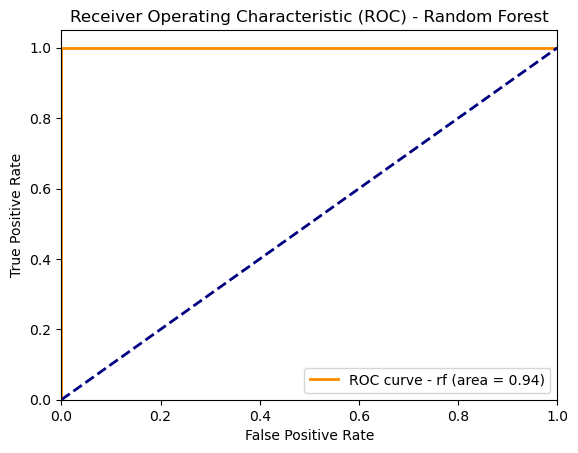

In [105]:
# Use SimpleImputer to fill in missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Create a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) as needed

# Fit the model
rf.fit(x_train_imputed, y_train)

# Predict on the test set
y_pred_rf = rf.predict(x_test_imputed)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(" Random Forest Accuracy:", accuracy_rf)

cv_accuracy_rf = cross_val_score(rf, x_train_imputed, y_train, cv=5)
print(f"Cross-validated Random Forest Accuracy: {cv_accuracy.mean()*100}")
try:
    y_prob_rf = rf.predict_proba(x_test_imputed)[:, 1]


# Compute ROC curve and ROC area for each class
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
    plt.figure()
    plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve - rf (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
    plt.legend(loc="lower right")
    plt.show()
except AttributeError as e:
    print("AttributeError:", e)


Training Accuracy: 100.0

Testing Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       139

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



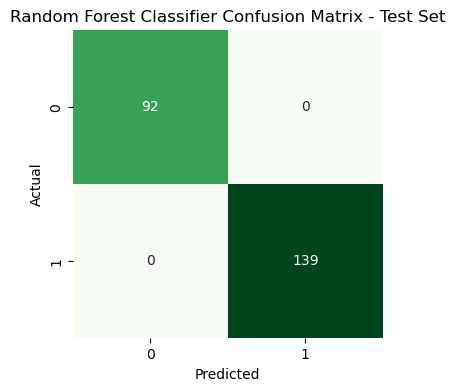

Sensitivity: 1.0
Specificity: 1.0
F1 Score: 1.0
Precision: 1.0
Negative Predictive Value: 1.0
False Negative Rate: 0.0
False Positive Rate: 0.0
False Discovery Rate: 0.0
False Omission Rate: 0.0

5-Fold Cross-Validation Scores:
[0.97222222 0.97222222 0.98148148 0.94392523 0.99065421]

Average Cross-Validation Accuracy: 97.30%


In [106]:
fun(rf,'Random Forest Classifier')

Accuracy: 0.8225108225108225
Cross-validated K Neighbours Classifier Accuracy: 70.80823814468674


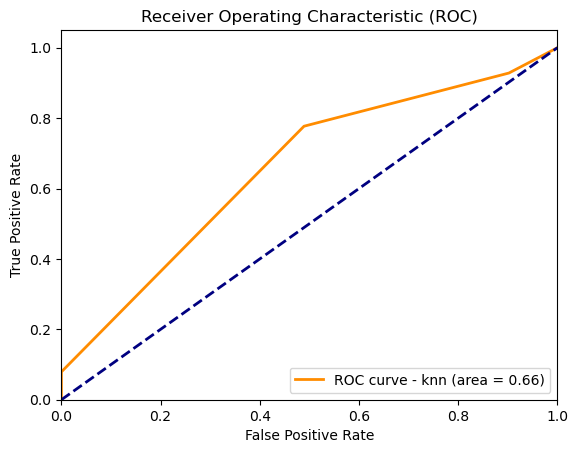

In [107]:
# Handling missing values if necessary (using SimpleImputer as an example)
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Standardize the features (important for KNN)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Fit the model
knn.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

cv_accuracy = cross_val_score(knn, x_train_imputed, y_train, cv=5)
print(f"Cross-validated K Neighbours Classifier Accuracy: {cv_accuracy.mean()*100}")
try:
    y_prob = knn.predict_proba(x_test_imputed)[:, 1]

# Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

# Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - knn (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
except AttributeError as e:
    print("AttributeError:", e)



Training Accuracy: 52.417

Testing Accuracy: 59.741
              precision    recall  f1-score   support

           0       0.47      0.10      0.16        92
           1       0.61      0.93      0.74       139

    accuracy                           0.60       231
   macro avg       0.54      0.51      0.45       231
weighted avg       0.55      0.60      0.51       231



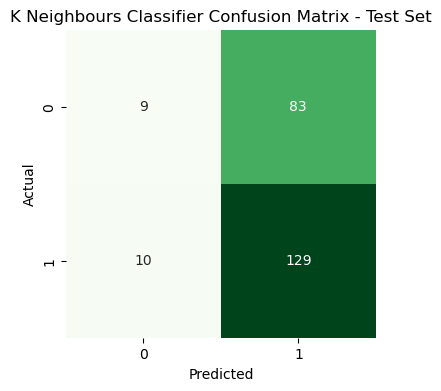

Sensitivity: 0.929
Specificity: 0.098
F1 Score: 0.736
Precision: 0.609
Negative Predictive Value: 0.474
False Negative Rate: 0.072
False Positive Rate: 0.903
False Discovery Rate: 0.392
False Omission Rate: 0.527

5-Fold Cross-Validation Scores:
[0.71296296 0.7037037  0.69444444 0.70093458 0.65420561]

Average Cross-Validation Accuracy: 69.40%


In [108]:
fun(knn,'K Neighbours Classifier')

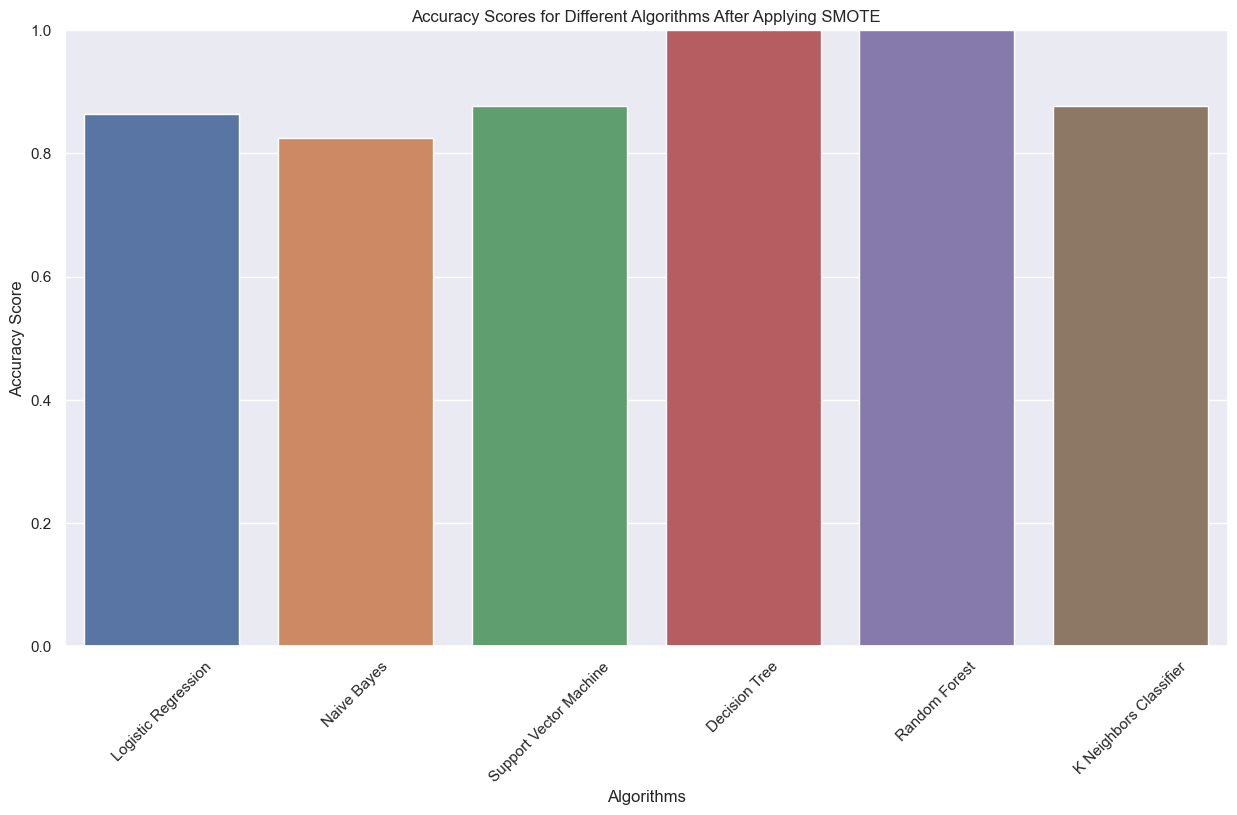

In [109]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Train classifiers
lr = LogisticRegression(random_state=42, solver='liblinear', multi_class='auto')
nb = GaussianNB()
svm = SVC(kernel='linear', random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

classifiers = {'Logistic Regression': lr,
               'Naive Bayes': nb,
               'Support Vector Machine': svm,
               'Decision Tree': dt,
               'Random Forest': rf,
               'K Neighbors Classifier': knn}

accuracy_scores = {}

for clf_name, clf in classifiers.items():
    # Train classifier
    clf.fit(x_train_resampled, y_train_resampled)
    
    # Predict on the testing set
    y_pred = clf.predict(x_test_scaled)
    
    # Calculate accuracy after applying SMOTE
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[clf_name] = accuracy

# Plot the bar graph
sns.set(rc={'figure.figsize':(15, 8)})
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Different Algorithms After Applying SMOTE")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit for better visualization (accuracy ranges from 0 to 1)
plt.show()


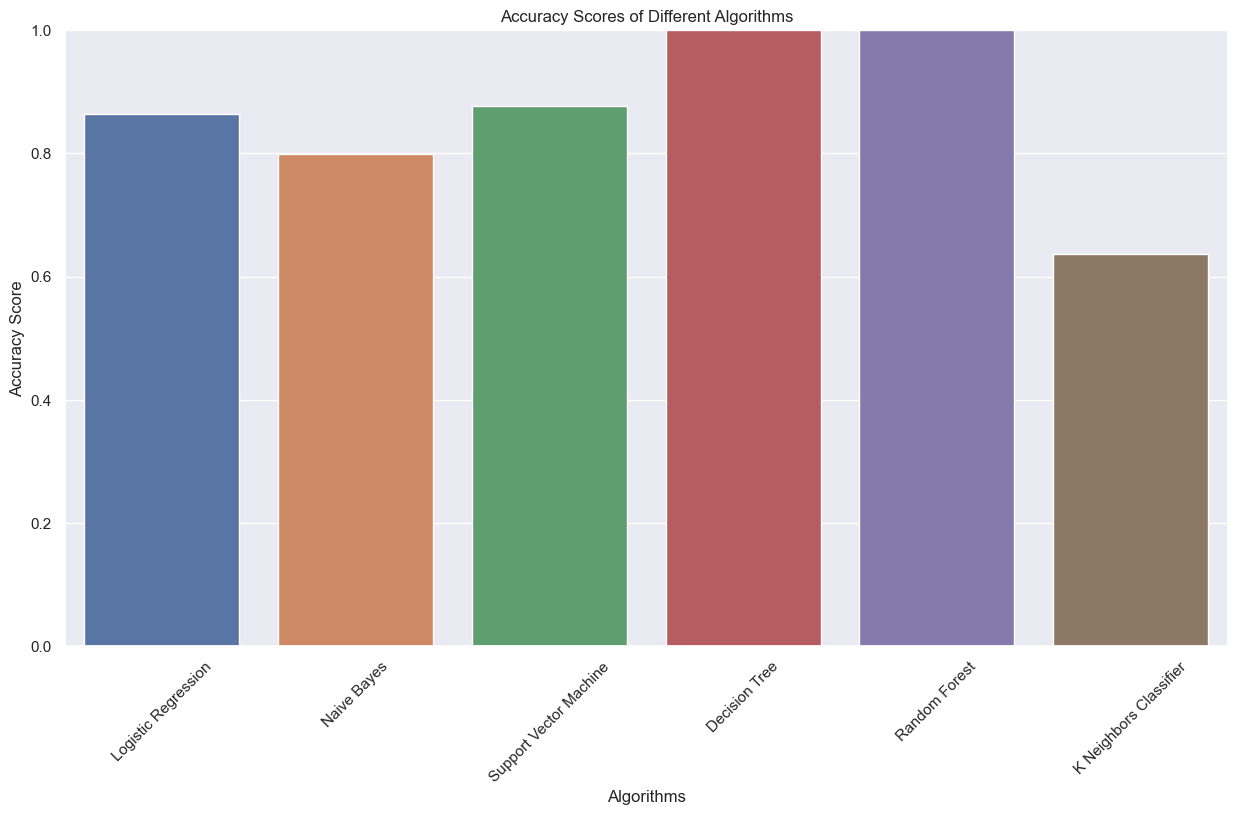

In [110]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Training classifiers
lr = LogisticRegression(random_state=42, solver='liblinear', multi_class='auto')
lr.fit(X_train_resampled, y_train_resampled)

nb = GaussianNB()
nb.fit(X_train, y_train)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_resampled, y_train_resampled)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr.predict(X_test_scaled)
y_pred_nb = nb.predict(X_test)
y_pred_svm = svm.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Calculating accuracy scores
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Storing accuracy scores and algorithm names in lists
scores = [accuracy_lr, accuracy_nb, accuracy_svm, accuracy_dt, accuracy_rf, accuracy_knn]
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "Decision Tree", "Random Forest", "K Neighbors Classifier"]

# Plotting the bar chart
sns.set(rc={'figure.figsize':(15, 8)})
sns.barplot(x=algorithms, y=scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores of Different Algorithms")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.ylim(0, 1)  # Set y-axis limit for better visualization (accuracy ranges from 0 to 1)
plt.show()


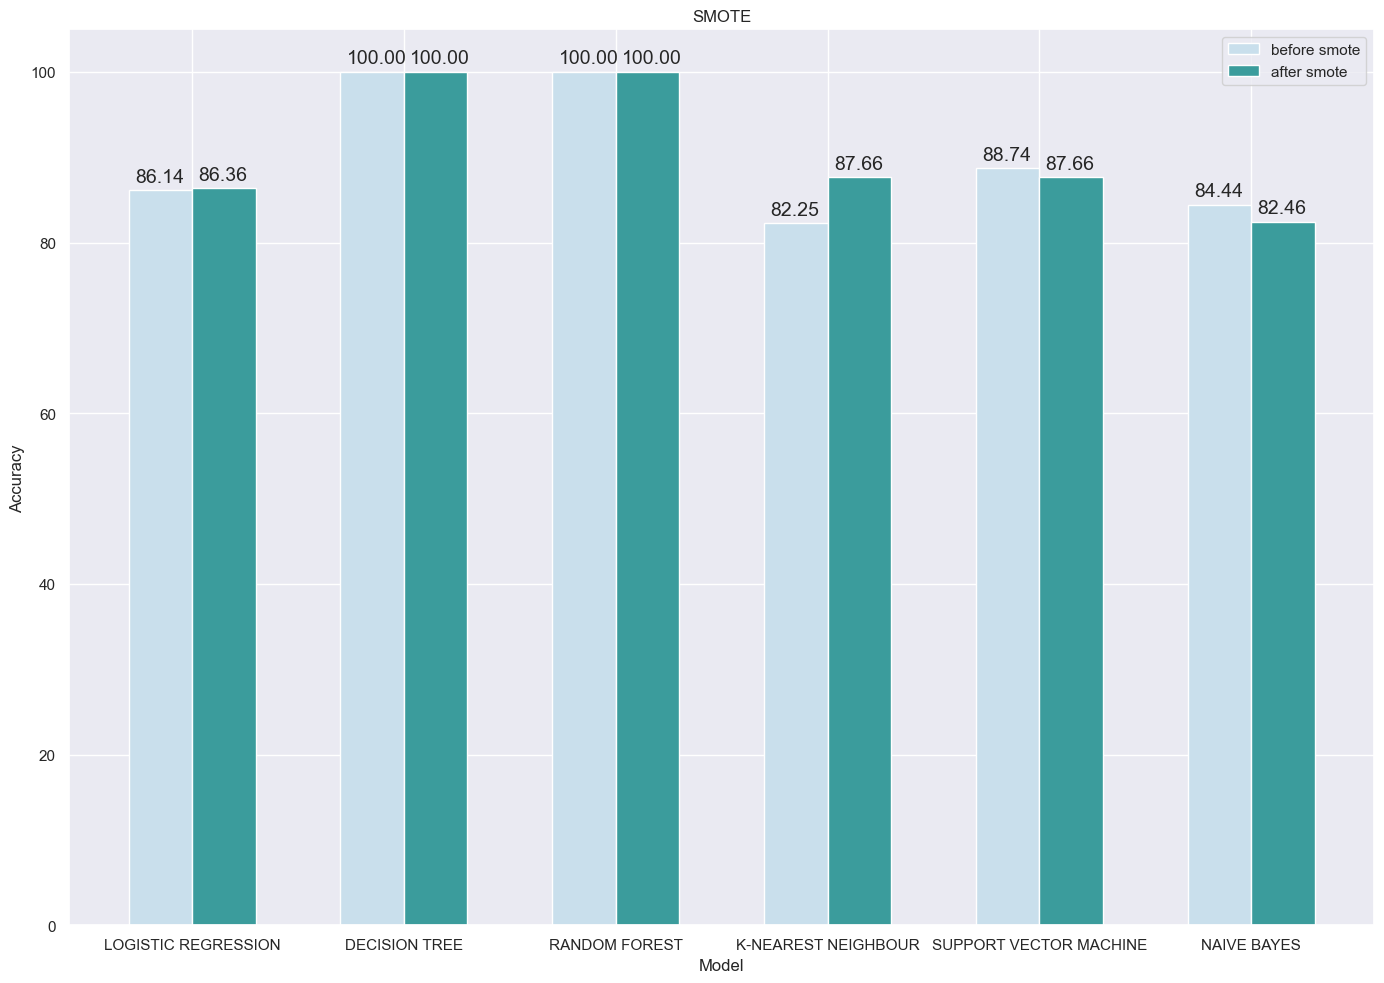

In [111]:
data_before = {

    'Model': ['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST','K-NEAREST NEIGHBOUR','SUPPORT VECTOR MACHINE','NAIVE BAYES'],
    'Accuracy': [86.14, 100, 100, 82.25,88.74,84.44],
}

data_after = {
    'Model': ['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST','K-NEAREST NEIGHBOUR','SUPPORT VECTOR MACHINE','NAIVE BAYES'],
    'Accuracy': [86.36,100,100,87.66,87.66,82.46],
}



# Create dataframes
dtfm_before = pd.DataFrame(data_before)
dtfm_after = pd.DataFrame(data_after)

# Set the Model column as the index for better plotting
dtfm_before.set_index('Model', inplace=True)
dtfm_after.set_index('Model', inplace=True)

# Create a bar graph
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))
def plot_bargraph(ax, metric, title):
    before_values = dtfm_before[metric]
    after_values = dtfm_after[metric]
    models = dtfm_before.index

    index = np.arange(len(models))
    bar_width = 0.3

    ax.bar(index, before_values, width=bar_width, label='before smote', color='#C9DFEC')
    ax.bar(index + bar_width, after_values, width=bar_width, label='after smote', color='#3B9C9C')

    for i in range(len(models)):
        ax.text(index[i] - 0.12, before_values[i] + 1, f'{before_values[i]:.2f}', fontsize=14)
        ax.text(index[i] + bar_width - 0.12, after_values[i] + 1, f'{after_values[i]:.2f}', fontsize=14)

    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models)
    ax.legend()

plot_bargraph(axes, 'Accuracy', 'SMOTE')
plt.tight_layout()
plt.show()

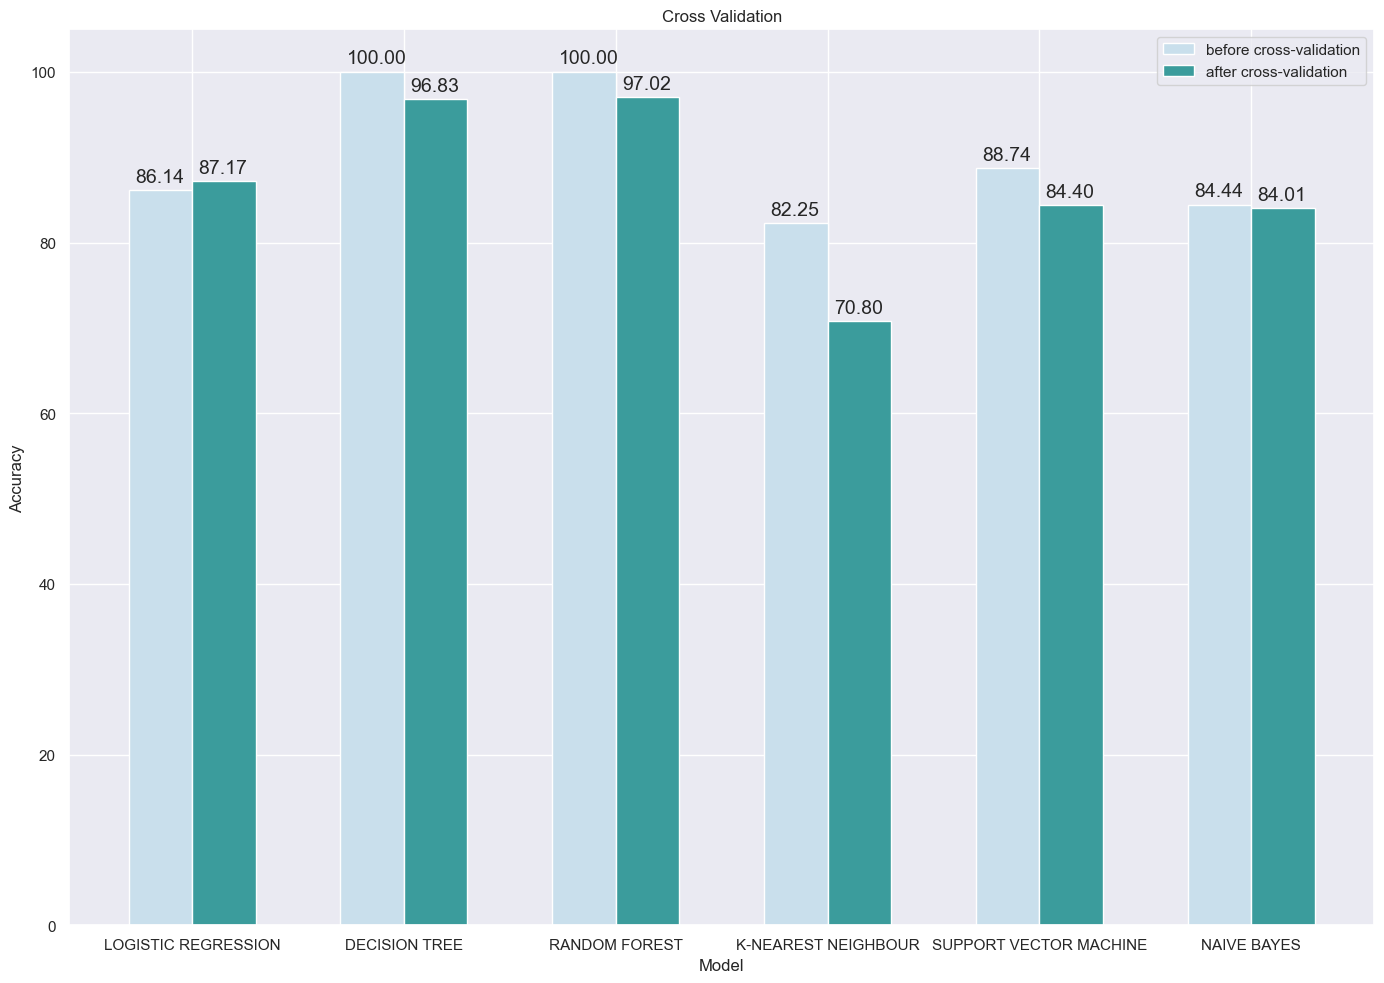

In [112]:
data_before = {

    'Model': ['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST','K-NEAREST NEIGHBOUR','SUPPORT VECTOR MACHINE','NAIVE BAYES'],
    'Accuracy': [86.14, 100, 100, 82.25,88.74,84.44],
}

data_after = {
    'Model': ['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST','K-NEAREST NEIGHBOUR','SUPPORT VECTOR MACHINE','NAIVE BAYES'],
    'Accuracy': [87.17,96.83,97.02,70.80,84.40,84.01],
}



# Create dataframes
dtfm_before = pd.DataFrame(data_before)
dtfm_after = pd.DataFrame(data_after)

# Set the Model column as the index for better plotting
dtfm_before.set_index('Model', inplace=True)
dtfm_after.set_index('Model', inplace=True)

# Create a bar graph
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))
def plot_bargraph(ax, metric, title):
    before_values = dtfm_before[metric]
    after_values = dtfm_after[metric]
    models = dtfm_before.index

    index = np.arange(len(models))
    bar_width = 0.3

    ax.bar(index, before_values, width=bar_width, label='before cross-validation', color='#C9DFEC')
    ax.bar(index + bar_width, after_values, width=bar_width, label='after cross-validation', color='#3B9C9C')

    for i in range(len(models)):
        ax.text(index[i] - 0.12, before_values[i] + 1, f'{before_values[i]:.2f}', fontsize=14)
        ax.text(index[i] + bar_width - 0.12, after_values[i] + 1, f'{after_values[i]:.2f}', fontsize=14)

    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models)
    ax.legend()

plot_bargraph(axes, 'Accuracy', 'Cross Validation')
plt.tight_layout()
plt.show()

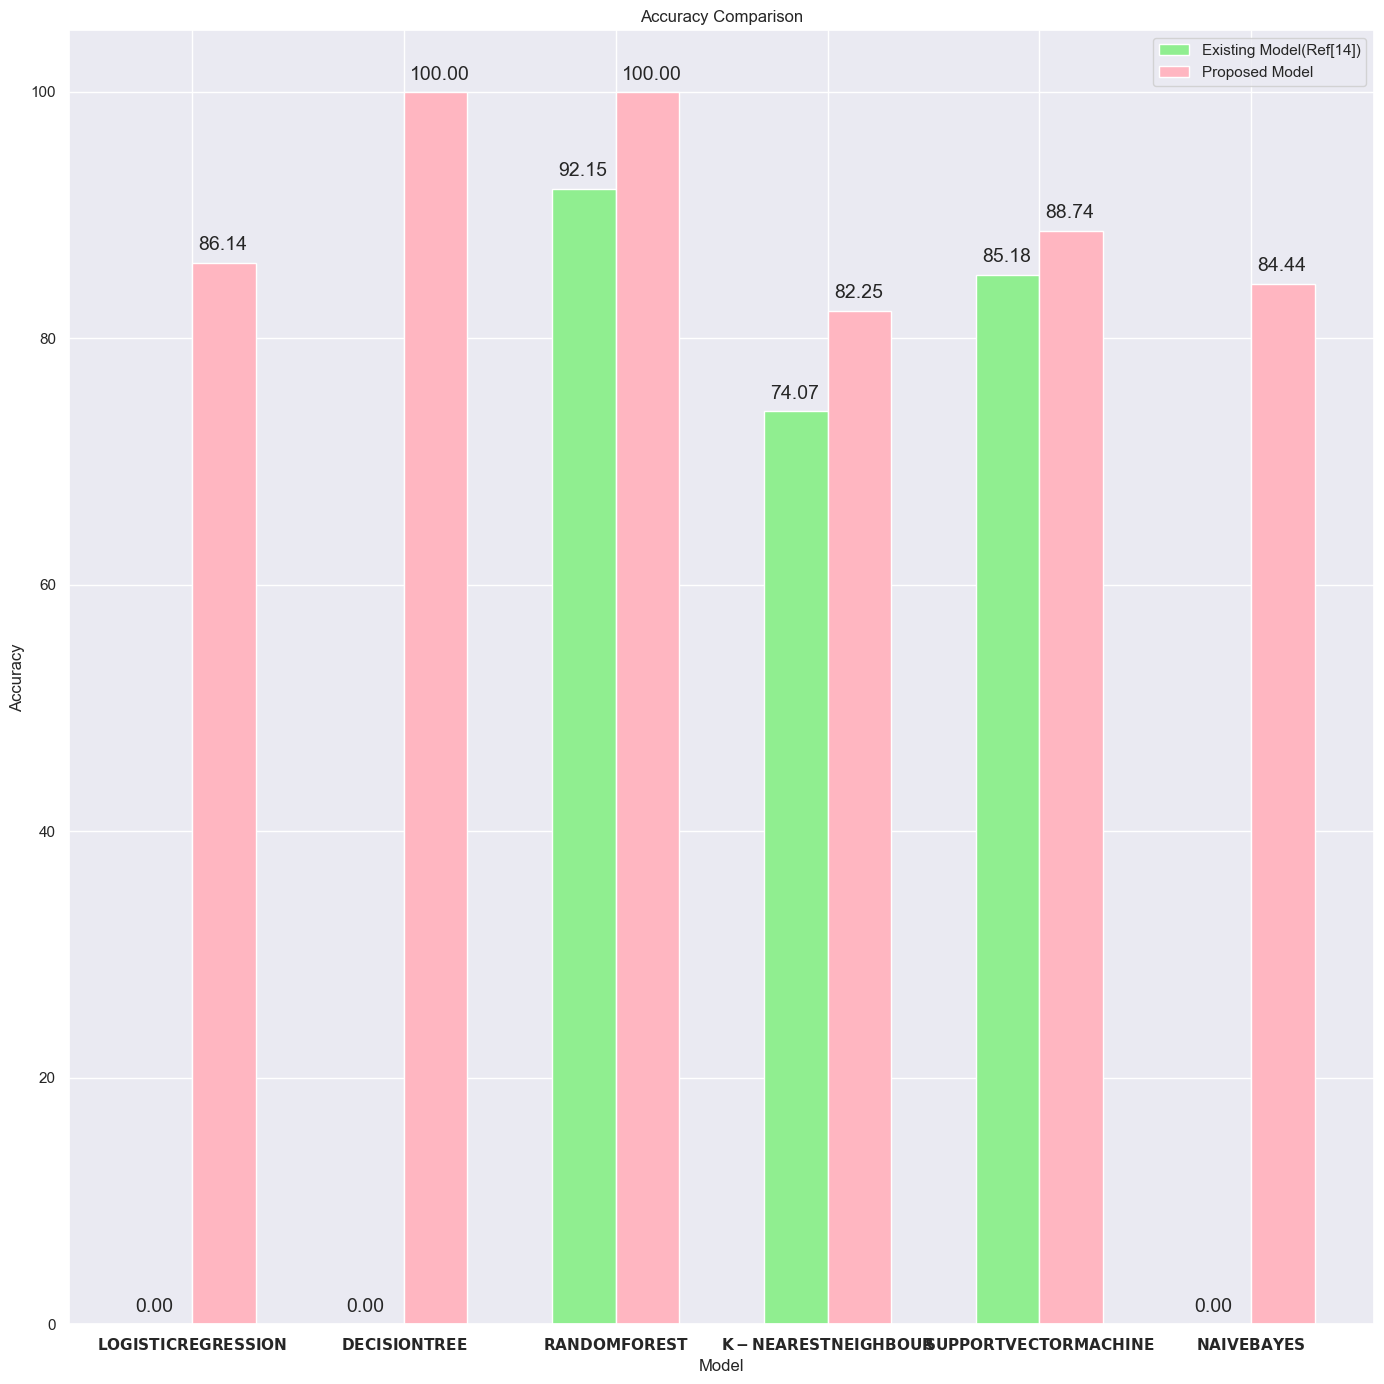

In [113]:
data_before = {
    'Model': ['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST', 'K-NEAREST NEIGHBOUR', 'SUPPORT VECTOR MACHINE', 'NAIVE BAYES'],
    'Accuracy': [ 0,0 , 92.15, 74.07, 85.18, 0],
}
lr_ac = 86.14
dt_ac = 100
rf_ac = 100
kn_ac = 82.25
sv_ac = 88.74
nb_ac = 84.44


data_after = {
    'Model': ['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST', 'K-NEAREST NEIGHBOUR', 'SUPPORT VECTOR MACHINE', 'NAIVE BAYES'],
    'Accuracy': [lr_ac, dt_ac, rf_ac, kn_ac, sv_ac, nb_ac],
}

# Create dataframes
dtfm_before = pd.DataFrame(data_before)
dtfm_after = pd.DataFrame(data_after)

# Set the Model column as the index for better plotting
dtfm_before.set_index('Model', inplace=True)
dtfm_after.set_index('Model', inplace=True)

# Create a bar graph
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 14))

def plot_bargraph(ax, metric, title):
    before_values = dtfm_before[metric]
    after_values = dtfm_after[metric]
    models = dtfm_before.index

    index = np.arange(len(models))
    bar_width = 0.3

    ax.bar(index, before_values, width=bar_width, label='Existing Model(Ref[14])', color='lightgreen')
    ax.bar(index + bar_width, after_values, width=bar_width, label='Proposed Model', color='lightpink')

    for i in range(len(models)):
        ax.text(index[i] - 0.12, before_values[i] + 1, f'{before_values[i]:.2f}', fontsize=14)
        ax.text(index[i] + bar_width - 0.12, after_values[i] + 1, f'{after_values[i]:.2f}', fontsize=14)

    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels([f"$\mathbf{{{model}}}$" for model in models])  # Bold model names using LaTeX
    ax.legend()

plot_bargraph(axes, 'Accuracy', 'Accuracy Comparison')
plt.tight_layout()
plt.show()


In [114]:
import pickle
pickle.dump(rf,open('rf.pkl','wb'))
